<a href="https://www.kaggle.com/code/therealoise/bellabeat-case-study-with-python?scriptVersionId=106418429" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

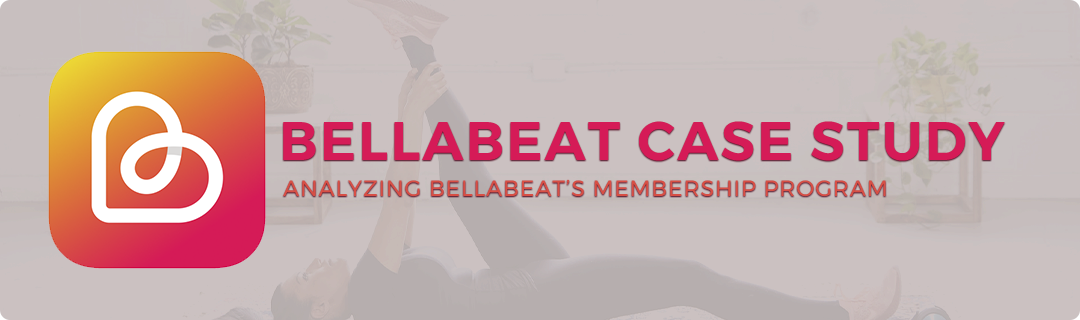

## **<span style="color:#f22a51">INTRODUCTION</span>**
Bellabeat is a high-tech manufacturer of health-focused products for women such as `Bellabeat app`, `Leaf`, `Time`, `Spring`, and `Bellabeat membership`. It was founded in 2013 by `Urška Sršen` and `Sando Mur`. The company is quite successful, with lots of potential to become a larger player in the global smart device industry. The founders are of the view that analyzing smart device fitness data could help unlock new growth opportunities for the company.

In this case study, I will follow the six steps of the data analysis process: **ask**, **prepare**, **process**, **analyze**, **share**, and **act**, to break down how I analyzed the FitBit fitness Tracker Data in order to gain some insights that could be beneficial to Bellabeat.

## **<span style="color:#f22a51">1. ASK</span>**

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">1.1. KEY STAKEHOLDERS</h4>

1.	**Urška Sršen**: Cofounder and Chief Creative Officer at Bellabeat.
2.	**Sando Mur**: Cofounder and key member of the Bellabeat executive team. 
3.	**Marketing analytics team at Bellabeat**: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.
4.	**Customers**: Everyone who purchases their product or use Bellabeat’s services. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">1.2. BUSINESS TASK</h4>

1.	To analyze FitBit Fitness Tracker Data from thirty eligible FitBit users, in order to gain some insights that could unlock new growth opportunities for the company. 
2.	To focus on one of Bellabeat’s products and analyze smart device data to gain insight into how customers are using their smart devices. <br>For this case study, I will focus on the **Bellabeat membership program**. This is a subscription-based membership program that gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

## **<span style="color:#f22a51">2: PREPARE</span>**

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">2.1. DATA SOURCE</h4>

1.	The data is a free to use **FitBit** Fitness tracker dataset made available through Mobius. It contains personal fitness tracker data from over thirty FitBit users who have given consent to use their data. 
2.	There are 18 csv files in all, but the datasets I find relevant to the product I want to focus on are daily activity, hourly calories, hourly steps, and sleep day dataset. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">2.2. SORTING THE DATA</h4>

1.	To have a quick overview of the data I have chosen, I opened each of them in Google sheets. The first thing I noticed was that the data was organized in a long format. I also noticed that the dailyActivity_merged data contains some metrics that can give us some insights like the total steps taken by the Fitbit users, the active minutes spent, and the calories burned. With that we can establish some correlation between calories burned and the steps taken. The hourly calories and the hourly steps contain info about the activity hour that will help give some insight about calories and the time of the day.
2.	I then created a separate folder on my desktop to store the files, since I was going to use python and jupyter notebook to process the data. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">2.3. DATA CREDIBILITY</h4>

1.	In terms of reliability, a general rule of thumb for the Large Enough Sample Condition is that the sample size should be greater than or equal to 30. **[Reference](https://reviews.tn/wiki/why-is-30-a-good-sample-size/)**. Hence, we can say that with 33 FitBit Users, we can derive some good insights that can be generalized.
2.	In terms of recency, the data is also still current since it’s not older than 10 years.
3.	The data collected also matches Bellabeat’s products. Hence, some results from the analysis can be applied to Bellabeat’s products.
4.	Even though this is a third-party data, the quality of the data is not questionable. The source is also known.

## **<span style="color:#f22a51">3: PROCESS</span>**

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">3.1. LOADING LIBRARIES</h4>

Let's start by loading the libraries we would need for processing and visualizing the data.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### <span style="color:#f22a51">Loading Datasets</span>

Next, we'll load the fitbit datasets we're interested in exploring for insights.

In [2]:
daily_activity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
hourly_steps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
hourly_calories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
sleepday = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
daily_calories = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_intensity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
weight_log = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
daily_steps = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
heartrate_secs = pd.read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">3.2. DATA EXPLORATION</h4>

Let's explore our data by viewing some statistical information about them.

We'll start by pulling the first 5 rows of each dataset.

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [5]:
hourly_calories.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [6]:
sleepday.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [7]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [8]:
daily_intensity.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [9]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [10]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [11]:
heartrate_secs.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [12]:
print("Daily Activity:",daily_activity.columns)
print("Hourly Steps:",hourly_steps.columns)
print("Hourly Calories:",hourly_calories.columns)
print("Sleepday:",sleepday.columns)
print("Daily Calories:",daily_calories.columns)
print("Daily Intensity:",daily_intensity.columns)
print("Weight Log:",weight_log.columns)
print("Daily Steps:",daily_steps.columns)
print("Heart Rate:",heartrate_secs.columns)

Daily Activity: Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Hourly Steps: Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Hourly Calories: Index(['Id', 'ActivityHour', 'Calories'], dtype='object')
Sleepday: Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')
Daily Calories: Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Daily Intensity: Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Weight Log: Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')
Daily Steps: Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')
He

Next, let's see how many **<span style="color:#f22a51">unique users</span>** are in each dataset. We'll start with the first 4, and then the last 4.

In [13]:
print("Daily Activity Dataset:",daily_activity.Id.nunique(), "unique users")
print("Hourly Steps Dataset:",hourly_steps.Id.nunique(), "unique users")
print("Hourly Calories Dataset:",hourly_calories.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleepday.Id.nunique(), "unique users")
print("Daily Calories Dataset:",daily_calories.Id.nunique(), "unique users")  
print("Daily Intensity Dataset:",daily_intensity.Id.nunique(), "unique users")
print("Weight Logged Dataset:",weight_log.Id.nunique(), "unique users")
print("Daily Steps Dataset:",daily_steps.Id.nunique(), "unique users")
print("Heart Rate Dataset:",heartrate_secs.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
Hourly Steps Dataset: 33 unique users
Hourly Calories Dataset: 33 unique users
SleepDay Dataset: 24 unique users
Daily Calories Dataset: 33 unique users
Daily Intensity Dataset: 33 unique users
Weight Logged Dataset: 8 unique users
Daily Steps Dataset: 33 unique users
Heart Rate Dataset: 14 unique users


Let's view the **<span style="color:#f22a51">data types</span>** in each dataset.

In [14]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [15]:
hourly_steps.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

In [16]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [17]:
sleepday.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [18]:
daily_calories.dtypes

Id              int64
ActivityDay    object
Calories        int64
dtype: object

In [19]:
daily_intensity.dtypes

Id              int64
ActivityDay    object
Calories        int64
dtype: object

In [20]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [21]:
daily_steps.dtypes

Id              int64
ActivityDay    object
StepTotal       int64
dtype: object

In [22]:
heartrate_secs.dtypes

Id        int64
Time     object
Value     int64
dtype: object

Next, let's view their **<span style="color:#f22a51">shape</span>**

In [23]:
print("Shape of Daily Activity:",daily_activity.shape)
print("Shape of Hourly Steps:",hourly_steps.shape)
print("Shape of Hourly Calories:",hourly_calories.shape)
print("Shape of SleepDay:",sleepday.shape)
print("Shape of Daily Calories:",daily_calories.shape)  
print("Shape of Daily Intensity:",daily_intensity.shape)
print("Shape of Weight Logged:",weight_log.shape)
print("Shape of Daily Steps:",daily_steps.shape) 
print("Shape of Heart Rate:",heartrate_secs.shape) 

Shape of Daily Activity: (940, 15)
Shape of Hourly Steps: (22099, 3)
Shape of Hourly Calories: (22099, 3)
Shape of SleepDay: (413, 5)
Shape of Daily Calories: (940, 3)
Shape of Daily Intensity: (940, 3)
Shape of Weight Logged: (67, 8)
Shape of Daily Steps: (940, 3)
Shape of Heart Rate: (2483658, 3)


Next, let's check if we have **<span style="color:#f22a51">missing values</span>** in our datasets, weight_logged dataset not inclusive.

In [24]:
print("Daily Activity Dataset has",daily_activity.isnull().values.sum(), "missing values")
print("Hourly Steps Dataset has",hourly_steps.isnull().values.sum(), "missing values")
print("Hourly Calories Dataset has",hourly_calories.isnull().values.sum(), "missing values")
print("SleepDay Dataset has",sleepday.isnull().values.sum(), "missing values")
print("Daily Calories Dataset has",daily_calories.isnull().values.sum(), "missing values")  
print("Daily Intensity Dataset has",daily_intensity.isnull().values.sum(), "missing values")
print("Daily Steps Dataset has",daily_steps.isnull().values.sum(), "missing values")
print("Heart Rate Dataset has",heartrate_secs.isnull().values.sum(), "missing values")

Daily Activity Dataset has 0 missing values
Hourly Steps Dataset has 0 missing values
Hourly Calories Dataset has 0 missing values
SleepDay Dataset has 0 missing values
Daily Calories Dataset has 0 missing values
Daily Intensity Dataset has 0 missing values
Daily Steps Dataset has 0 missing values
Heart Rate Dataset has 0 missing values


Let's also check for duplicates.

In [25]:
print("Duplicates in Daily Acitivity: ", daily_activity.duplicated().head())
print("Duplicates in Hourly Steps: ", hourly_steps.duplicated().head())
print("Duplicates in Hourly Calories: ", hourly_calories.duplicated().head())
print("Duplicates in Sleepday: ", sleepday.duplicated().head())
print("Duplicates in Daily Calories: ", daily_calories.duplicated().head())  
print("Duplicates in Daily Intensity: ", daily_intensity.duplicated().head())
print("Duplicates in Daily Steps: ", daily_steps.duplicated().head())
print("Duplicates in Heart Rate: ", heartrate_secs.duplicated().head())

Duplicates in Daily Acitivity:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Hourly Steps:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Hourly Calories:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Sleepday:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Daily Calories:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Daily Intensity:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Daily Steps:  0    False
1    False
2    False
3    False
4    False
dtype: bool
Duplicates in Heart Rate:  0    False
1    False
2    False
3    False
4    False
dtype: bool


<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">3.2. SUMMARY OF INITIAL FINDINGS</h4>

* Of all the datasets we inspected, `heartrate_secs`, `weight_logged` and `sleepday` fell short of our **n>=30** rule. `heartrate_secs` has **n=14**, and `weight_logged` only has **n=8**, hence we’re going to drop both of them. `sleepday` has **n=24**, which is also quite small. However, we are going to keep it, since we might gain some relevant insights from it.

* `daily_calories`, `daily_intensity`, and `daily_steps` all have exactly the same data that is found in the `daily_activity` dataset. **StepTotal** in `daily_intensity` was only changed to **TotalSteps** in `daily_activity` datasets. Other than that, they are the same data. Hence, we’ll discard them. Leaving us with `daily_activity`, `hourly_steps`, `hourly_calories`, and `sleepday datasets`.

* From the shape, I observed that `hourly_steps` and `hourly_calories` have similar structures: (22099, 3). Hence, we can decide to merge them for further analysis.

* As for the data types, **<span style="color:#f22a51">"ActivityDate”</span>** in `daily_activity`, **<span style="color:#f22a51">“ActivityHour”</span>** in `hourly_steps`, **<span style="color:#f22a51">“ActivityHour”</span>** in `hourly_calories`, and **<span style="color:#f22a51">“SleepDay”</span>** in `sleepday` are `objects` instead of `datetime` data type. We’ll have to convert them to `datetime` data type for easy processing.

* I also observed that there are **NO** missing values and duplicates in all datasets.

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">3.3. DATA TRANSFORMATION</h4>

Let's start by converting the **<span style="color:#f22a51">"ActivityDate”</span>** in `daily_activity`, **<span style="color:#f22a51">“ActivityHour”</span>** in `hourly_steps`, **<span style="color:#f22a51">“ActivityHour”</span>** in `hourly_calories`, and **<span style="color:#f22a51">“SleepDay”</span>** in `sleepday` to `datetime` data type.

In [26]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

**<span style="color:#f22a51">Let's Check for Changes</span>**

In [27]:
print("Daily Acitivity data type is", daily_activity["ActivityDate"].dtypes, "data type")
print("Hourly Steps data type is", hourly_steps["ActivityHour"].dtypes, "data type")
print("Hourly Calories data type is", hourly_calories["ActivityHour"].dtypes, "data type")
print("Sleepday data type is", sleepday["SleepDay"].dtypes, "data type")

Daily Acitivity data type is datetime64[ns] data type
Hourly Steps data type is datetime64[ns] data type
Hourly Calories data type is datetime64[ns] data type
Sleepday data type is datetime64[ns] data type


They are now all in the right data types, which is the `datetime` data type.

**<span style="color:#f22a51">Merge hourly_steps with hourly_calories datasets.</span>**

In [28]:
for col in hourly_steps.columns, hourly_calories.columns:
    print (col)

Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')


Above we can see that they both share `Id` and `ActivityHour` in common. Hence, we'll merge them on `Id` and `ActivityHour`.

In [29]:
merge_df = pd.merge(hourly_steps, hourly_calories,
                    on=['Id', 'ActivityHour'], how='inner')

merge_df.head()

,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


Now we have a new dataframe `merge_df`. 

**<span style="color:#f22a51">Create new colums</span>**

Let's create a new column (WeekDay) from the `ActivityHour` in our new dataset `merged_df`, and `ActivityDate` in `daily_activity`. This will help us see if the days of the week has any bearing on our analysis.

In [30]:
daily_activity["WeekDay"] = daily_activity["ActivityDate"].dt.day_name()
merge_df["WeekDay"] = merge_df["ActivityHour"].dt.day_name()
sleepday["WeekDay"] = sleepday["SleepDay"].dt.day_name()

In [31]:
# View changes
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,WeekDay
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [32]:
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


We still need to make some changes to the merge_df dataframe. We need to extract the `ActivityHour` column, by creating a seaparate column for it. 

In [33]:
merge_df["DateHour"] = merge_df["ActivityHour"].dt.hour

In [34]:
merge_df.head()

,Id,ActivityHour,StepTotal,Calories,WeekDay,DateHour
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4


Now that we have our `DateHour`, lets remove the Hour min and sec.

In [35]:
merge_df["ActivityDay"] = merge_df["ActivityHour"].dt.date

Now, let's drop `ActivityHour`

In [36]:
merge_df = merge_df.drop("ActivityHour", axis = 1)
merge_df.head()

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [37]:
# Let's change ActivityDay to DateTime data type

merge_df["ActivityDay"] = pd.to_datetime(merge_df["ActivityDay"])

Next, we're going to merge `sleepday` with `merge_df` to create a new dataframe that contains sleepday record with calories for some analysis. Hence, before we do, let's change the column name `SleepDay` in sleepday df, so it matches `ActivityDay` in `merge_df`.

In [38]:
sleepday = sleepday.rename(columns={'SleepDay': 'ActivityDay'})
sleepday.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeekDay
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


Now, let's merge `sleepday` with `merge_df`. But first, let's see the columns they share in common.

In [39]:
for col in merge_df.columns, sleepday.columns:
    print (col)

Index(['Id', 'StepTotal', 'Calories', 'WeekDay', 'DateHour', 'ActivityDay'], dtype='object')
Index(['Id', 'ActivityDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'WeekDay'],
      dtype='object')


Since they have `Id`, `ActivityDay` and `WeekDay` in common, we'll merge both dataframes on `Id`, `ActivityDay` and `WeekDay`.

In [40]:
merge_df2 = pd.merge(merge_df, sleepday,
                    on=['Id', 'ActivityDay', 'WeekDay'], how='inner')

merge_df2.head(5)

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346


In [41]:
merge_df2.tail(5)

,Id,StepTotal,Calories,WeekDay,DateHour,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
9766,8792009665,8,74,Wednesday,19,2016-05-04,1,439,463
9767,8792009665,132,91,Wednesday,20,2016-05-04,1,439,463
9768,8792009665,0,71,Wednesday,21,2016-05-04,1,439,463
9769,8792009665,0,70,Wednesday,22,2016-05-04,1,439,463
9770,8792009665,0,70,Wednesday,23,2016-05-04,1,439,463


Let's see how many unique users and missing values we have in our new dataframe

In [42]:
print("Merge_df2 Dataframe:",merge_df2.Id.nunique(), "unique users")
print("Merge_df2 DataFrame has",merge_df2.isnull().values.sum(), "missing values")

Merge_df2 Dataframe: 24 unique users
Merge_df2 DataFrame has 0 missing values


Great! Let's also make some changes to the daily_activity dataframe. We'll start by creating 2 additional columns (**<span style="color:#f22a51">TotalActiveMinutes</span>**, **<span style="color:#f22a51">TotalMinutes</span>**, and **<span style="color:#f22a51">TotalActiveHours</span>**). Then we'll remove some columns we won't need.

In [43]:
new_cols = ["Id", "ActivityDate", 
            "WeekDay", "TotalSteps", 
            "TotalDistance", "VeryActiveDistance", 
            "ModeratelyActiveDistance", "LightActiveDistance", 
            "SedentaryActiveDistance", "VeryActiveMinutes", 
            "FairlyActiveMinutes", "LightlyActiveMinutes", 
            "SedentaryMinutes", "TotalActiveMinutes", 
            "TotalMinutes", "TotalActiveHours", "Calories"]

daily_activity = daily_activity.reindex(columns=new_cols)

In [44]:
# Let's view the changes.
daily_activity[["TotalActiveMinutes",
                "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


Awesome! The **<span style="color:#f22a51">TotalActiveMinutes</span>** and **<span style="color:#f22a51">TotalMinutes</span>** columns have been created, but they currently don't have any values since they have not been created. 

For the **<span style="color:#f22a51">TotalActiveMinutes</span>**, I will created the values by summing up all the active minutes i.e 
`VeryActiveMinutes`, `FairlyActiveMinutes`, and `LightActiveMinutes` and for the **<span style="color:#f22a51">TotalMinutes</span>**, I will sum up the `TotalActiveMinutes` and the `SedentaryMinutes`.

In [45]:
daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"] + daily_activity["FairlyActiveMinutes"] + daily_activity["LightlyActiveMinutes"]
daily_activity["TotalMinutes"] = daily_activity["TotalActiveMinutes"] + daily_activity["SedentaryMinutes"]
daily_activity["TotalActiveHours"] = round(daily_activity["TotalActiveMinutes"] / 60)

In [46]:
daily_activity[["TotalActiveMinutes", "TotalMinutes", "TotalActiveHours"]].head()

,TotalActiveMinutes,TotalMinutes,TotalActiveHours
0,366,1094,6.0
1,257,1033,4.0
2,222,1440,4.0
3,272,998,5.0
4,267,1040,4.0


In [47]:
daily_activity.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,366,1094,6.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,257,1033,4.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,222,1440,4.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,272,998,5.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,267,1040,4.0,1863


## **<span style="color:#f22a51">4. ANALYZE</span>**
Now that our data is processed, it's time to analyze it for insights. We have narrowed down our datasets to 3 dataframes:
* `daily_activity`
* `merge_df`, and
* `merge_df2`

So, we're going to draw our insights from these dataframes. Let's start by getting some statistical info about them.

In [48]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,TotalMinutes,TotalActiveHours,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,227.542553,1218.753191,3.775532,2303.609574
std,2.424805e+09,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,121.776307,265.931767,2.057646,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,146.750000,989.750000,2.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,247.000000,1440.000000,4.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,317.250000,1440.000000,5.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,552.000000,1440.000000,9.000000,4900.000000


In [49]:
merge_df.describe()

,Id,StepTotal,Calories,DateHour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


In [50]:
merge_df2.describe()

,Id,StepTotal,Calories,DateHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000


#### **<span style="color:#f22a51">Some Key Findings</span>**
1. Out of 1218 Total minutes, 991 minutes were spent inactive (Sedentary). Approximately 228 active minutes were spent. 
2. An average of 7638 total steps were taken by the users daily.
3. There is also an average of 2304 calories burnt daily.
4. Also, there is a positive correlation between steps taken and calories burnt.

## **<span style="color:#f22a51">5. SHARE</span>**
Now is time to do some data visualization. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.1. CORRELATION MATRIX</h4>

Let see the correlation between TotalDistance --TotalSteps --SedentaryMinutes --TotalActiveMinutes --Calories

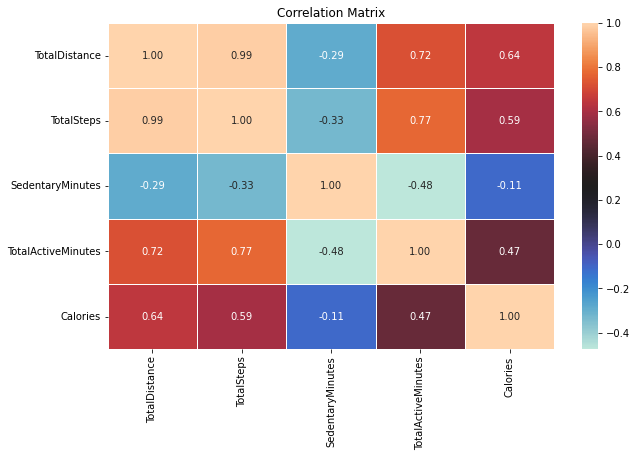

In [51]:
Corr1 = ["TotalDistance", "TotalSteps", 
         "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(daily_activity[Corr1].corr(), 
            annot = True, 
            fmt = ".2f",
            linewidths=0.5,
           cmap="icefire")

ax.set_title('Correlation Matrix');

* There is a positive correlation between `Calories` and `TotalActiveMinutes`, `TotalSteps`, and `TotalDistance`. 
* There is a negative correlation between `Calories` and `SedentaryMinutes`. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.2. COMPARING TOTAL STEPS AND SEDENTARY MINUTES TO CALORIES</h4>

/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


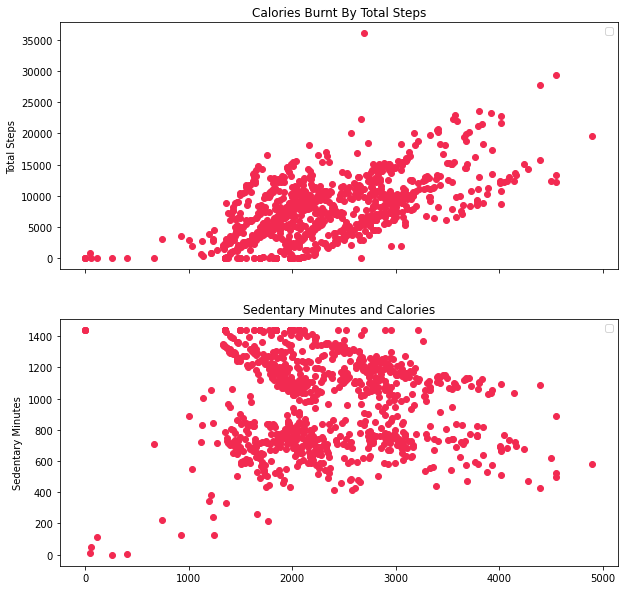

In [52]:
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=daily_activity["Calories"],
                     y=daily_activity["TotalSteps"],
                     color="#f22a51")
ax0.set(title="Calories Burnt By Total Steps",
       ylabel="Total Steps")

ax0.legend(*scatter.legend_elements(), title=None)

scatter = ax1.scatter(x=daily_activity["Calories"],
                     y=daily_activity["SedentaryMinutes"],
                     color="#f22a51")
ax1.set(title="Sedentary Minutes and Calories",
       ylabel="Sedentary Minutes")

ax1.legend(*scatter.legend_elements(), title=None);

* This scatterplot gives us a clearer view of the correlation between `TotalSteps` and `SedentaryMinutes` to `Calories`.
* The more the steps taken, the more the calories burnt. On the other hand, the more the Sedentary minutes, the less the calories burnt. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.3. SEDENTARY MINUTES VS TOTAL ACTIVE MINUTES</h4>

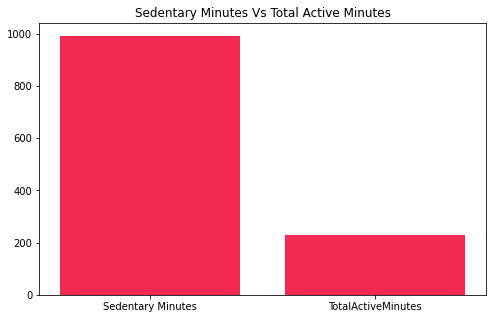

In [53]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.array(["Sedentary Minutes", "TotalActiveMinutes"])
y = np.array([daily_activity["SedentaryMinutes"].mean(),
              daily_activity["TotalActiveMinutes"].mean()])

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.bar(x, y, width = 0.8, color = "#f22a51")
plt.show()             

* There is a huge gap between `SedentaryMinutes` and `TotalActiveMinutes`. 
* It is obvious that the users spend more time sitting or lying down, than they do being active. This can also say something about their occupation or lifestyle. Mostly likely they belong to the working class that spends countless hours behind their desk.

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.4. TOTAL CALORIES BURNT BY DAY OF THE WEEK</h4>

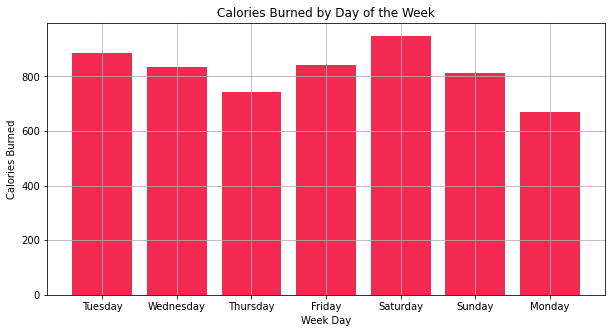

In [54]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(merge_df.WeekDay, merge_df.Calories, color = "#f22a51")
plt.xlabel("Week Day")
plt.ylabel("Calories Burned")
plt.title("Calories Burned by Day of the Week")
plt.grid()

plt.show()

* This plot shows that the most calories were burnt on **<span style="color:#f22a51">Saturday</span>** and that the least calories were burnt on **<span style="color:#f22a51">Monday</span>**. 
* Saturday is quite understandable being that it is a weekend and the users probably have enough time to exercise. Monday, on the other hand, is quite strange, given that is seen to be one of the busiest days at work for most people.
* The first thing that came to mind is the fact that the users could probably be very busy behind their work desks that they barely have enough time to exercise or take a walk. 


<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.5. TOTAL STEPS BY DAY OF THE WEEK</h4>
Next, I checked to see the relationship between Total Steps taken by Day of the Week.

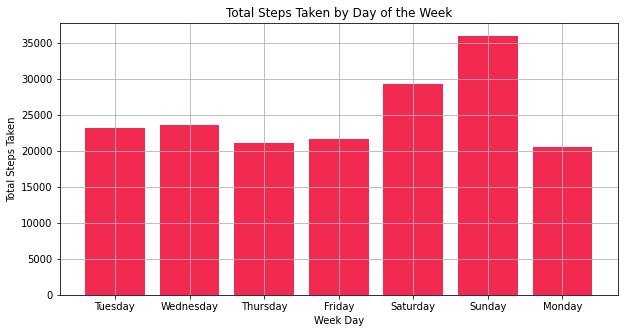

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(daily_activity.WeekDay, daily_activity.TotalSteps, 
        color = "#f22a51")
plt.xlabel("Week Day")
plt.ylabel("Total Steps Taken")
plt.title("Total Steps Taken by Day of the Week")
plt.grid()
plt.show()

* This gives us the true picture of why Monday recorded the least Calories burnt. Here we see that the least steps were taken by the users on Monday compared to the other days of the week. Meaning they probably spent more hours sitting behind their work desks.
* It also gives us a clue about the profile of the users in the survey. They are most likely working class individuals. 
* The most steps were taken on Saturday and Sunday, which makes sense. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.6. TOTAL TIME ASLEEP BY DAY OF THE WEEK</h4>

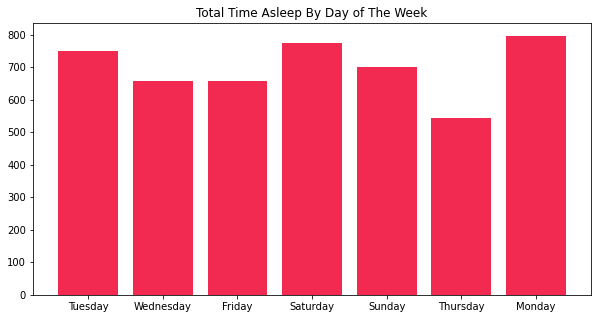

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
x = merge_df2["WeekDay"]
y = merge_df2["TotalMinutesAsleep"]

plt.title("Total Time Asleep By Day of The Week")
plt.bar(x, y, width = 0.8, color = "#f22a51")
plt.show() 

* This tells us that the least amount of sleep was taken on `Thursday` and the most amount of sleep was taken on Monday. Usually people tend to sleep longer when they are more exhausted. 
* However, we can also see that the users also slept longer hours on Saturday, Tuesday, and Sunday, which were also the days when they lost the most calories. 

<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">5.7. THE MOST AND LEAST ACTIVE HOURS OF THE DAY</h4>

Finally I checked to see the least active hours of the day

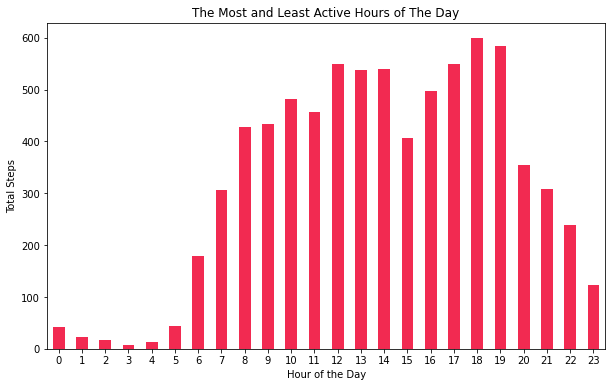

In [57]:
#Least active time of the day for targeted Ads

fig, axs = plt.subplots(figsize=(10, 6))
merge_df.groupby(merge_df['DateHour'])['StepTotal'].mean().plot(kind='bar', rot=0, ax=axs, color='#f22a51', title='The Most and Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

* Here we can see that their day starts getting really busy from 8 in the morning all the way to 7 in the evening. The least active hours of the day are between 8 p.m and 10 p.m. These are probably the best hours to reach them with targetted ads.


## **<span style="color:#f22a51">6. ACT</span>**
<h4 style="background-color:#f22a51;color:white;border-radius: 8px; padding:12px">6.1. RECOMMENDATION</h4>

1.	**<span style="color:#f22a51">Promotion</span>**: The data we explored revealed that consumers are less active between 8 and 10 p.m., shortly before they retire for the night. This is the ideal moment for Bellabeat to schedule their advertising initiatives for optimal results. Google AdWords, for example, allows internet advertisers to schedule when their adverts are shown with its ad scheduling function. Such functions can allow Bellabeat to effectively reach its consumers. Scheduling adverts will also help Bellabeat save money on advertisements.
2.	**<span style="color:#f22a51">Retention</span>**: The objective of any membership program is not limited to generating a regular stream of new members. Retention is crucial! According to an online **[report](https://themembershipguys.s3-us-west-2.amazonaws.com/Online+Membership+Industry+Report+-+2019.pdf)**, eighty percent of customers quit their subscription to a member site within the first two years of joining the site.  For Bellabeat to retain its consumers, it must focus on personalized contents that offer value. For instance, the data revealed a positive correlation between the number of steps walked and the number of calories burnt. The more steps a person takes each day, the more calories they burn.
* The data also revealed that one of the issues people have is that they are hardly able to reach the minimum 10,000 steps per day **[recommended](https://www.healthline.com/health/how-many-steps-a-day#How-many-steps-should-you-take-a-day?)** for healthy adults. To address this issue, Bellabeat can provide fascinating tips to assist its consumers achieve their daily objectives. This may be published periodically on its website. Additionally, it can create engaging challenges to motivate its users to walk regularly. This will not only drive engagement, but also provide enormous value to them. 
* I also noted that people spend far more time being inactive than being active. Inactivity is related with several health problems, including obesity, heart disease, stroke, etc. Bellabeat can create explainer videos and blogs to educate its users about the negative impacts of sedentary lifestyle and how to prevent them. This is also a fantastic opportunity to promote its other products, such as the Bellabeat app, which provides users with lifestyle-related health data, and Time, which links to the Bellabeat app to offer users with insights on their daily wellbeing.